In [203]:
# Mappa CMB (z 1000)
# Bisogna fare su sfera
'''
Sempre stesso concetto: spettro di potenza target del CMB
e vogliamo generare fluttuazioni gaussiane di temperatura
'''
import numpy as np
import matplotlib.pyplot as plt

import camb
import healpy as hp # per le mappe CMB

Healpix lavora con le mappe, pacchetto storico che gestisce dati sul piano del cielo; con definizione in pixel. Genera mappe che per py sono liste numeri, array. Le sa fare a varie risoluzione per campionare varie scale angolari. 

In [204]:
n_side = 256 # parametro risoluzione come potenze di 2
hp.nside2npix(n_side) #Sto pixellixando in questi pixel la sfera celeste

786432

In [205]:
hp.nside2pixarea(256, degrees=True) #scala angolare di risoluzione a cui corrisponde la pixelizzazione scelta

0.052455852825697924

In [206]:
#Array a caso
hp_map = np.arange(hp.nside2npix(256)) # lista di numeri grande quanto la pixelizzazione che voglio

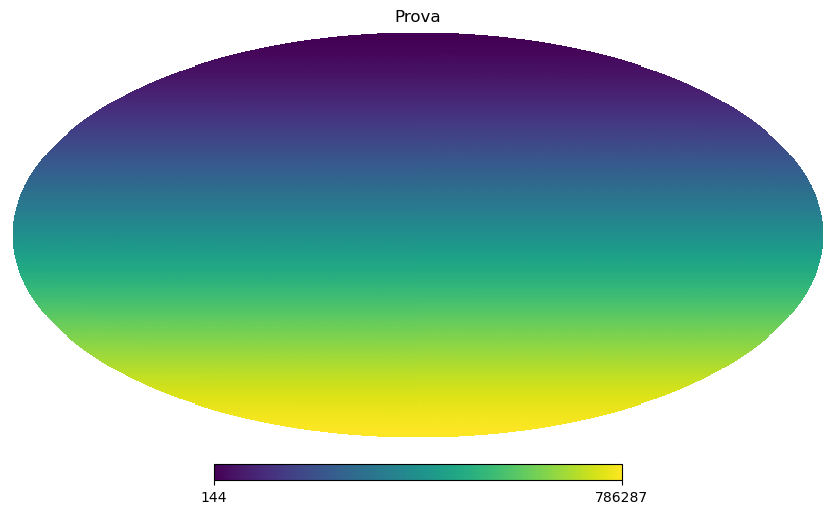

In [207]:
hp.mollview(hp_map, title='Prova') # ogni quadratino è pixel sulla sfera; se alta risoluzione è praticamente un continuo
# più alta risoluzione più pixel e computer esplode

In [208]:
#Supponiamo avere survay con oggetti puntiformi da piazzare
hp.ang2pix(nside=256, theta=np.pi/2, phi=0)# data posizione dice in che pixel cade

391680

Fondo cosmico mappa temperatura da CMB 

In [209]:
Omega_b = 0.05
Omega_c = 0.25

h = 0.7
As = 2.1e-9
ns = 0.96

pars= camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns);

result =camb.get_results(pars)

power = result.get_cmb_power_spectra(pars, CMB_unit='muK')

In [210]:
power.keys()

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

In [211]:
C_l = power['unlensed_scalar']

In [212]:
C_l.shape #2401 numero multipoli calcolo spetrro potenza, mentre 4 è tipi di spettri dentro

(2401, 4)

In [213]:
C_l = power['unlensed_scalar'][:,0] # tutti l , ma solo spettro in temperatura

In [214]:
ells = np.arange(len(C_l)) # definisco il vettore di l

Text(0, 0.5, '$C_l \\cdot \\ell (\\ell + 1) / {2 \\pi} \\, [\\mu K^2]$')

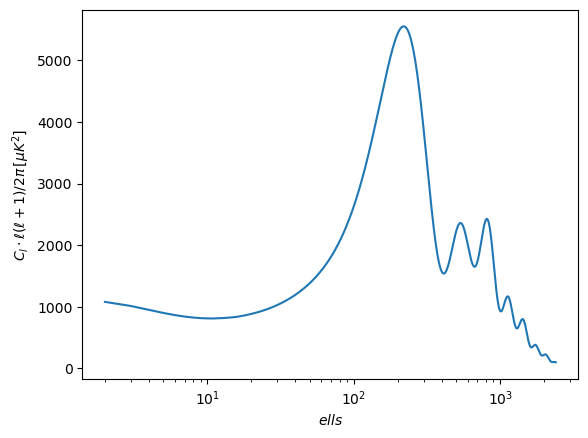

In [215]:
plt.semilogx(ells[2:], C_l[2:]) # primi 2 non li calcola e li pone nulli, per cui li escludiamo
plt.xlabel(r'$ells$')
plt.ylabel(r'$C_l \cdot \ell (\ell + 1) / {2 \pi} \, [\mu K^2]$')


In [216]:
# Dargli C_l non normalizzati e portati in K
power = result.get_cmb_power_spectra(pars, CMB_unit='K', raw_cl=True)

C_l = power['unlensed_scalar'][:, 0]


Text(0, 0.5, '$C_l\\, [K^2]$')

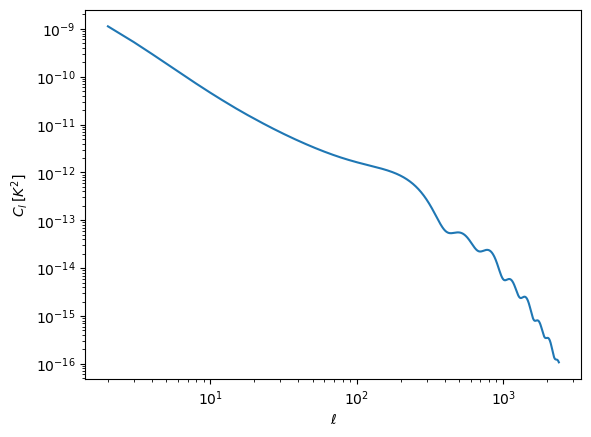

In [217]:
plt.loglog(ells[2:], C_l[2:])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_l\, [K^2]$')

In [218]:
# Coefficienti a_lm
alms = hp.synalm(C_l)

In [219]:
alms.shape # per ogni l, 2l+1 valori di m

(2883601,)

Text(0, 0.5, '$C_l\\, [K^2]$')

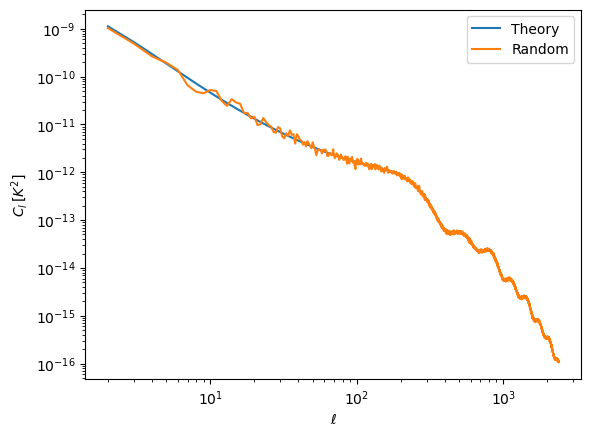

In [220]:
plt.loglog(ells[2:], C_l[2:], label='Theory')
plt.loglog(ells[2:], hp.alm2cl(alms)[2:], label='Random')
plt.legend(loc='best')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_l\, [K^2]$')

Ricorda:
$$
C_l=\Sigma |a_{lm}|^2
$$

In [221]:
# Mappa 

mock_map=hp.alm2map(alms, nside=1024)

In [222]:
mock_map.shape

(12582912,)

In [223]:
hp.nside2pixarea(512, degrees=True)#poco meno grado quadro

0.013113963206424481

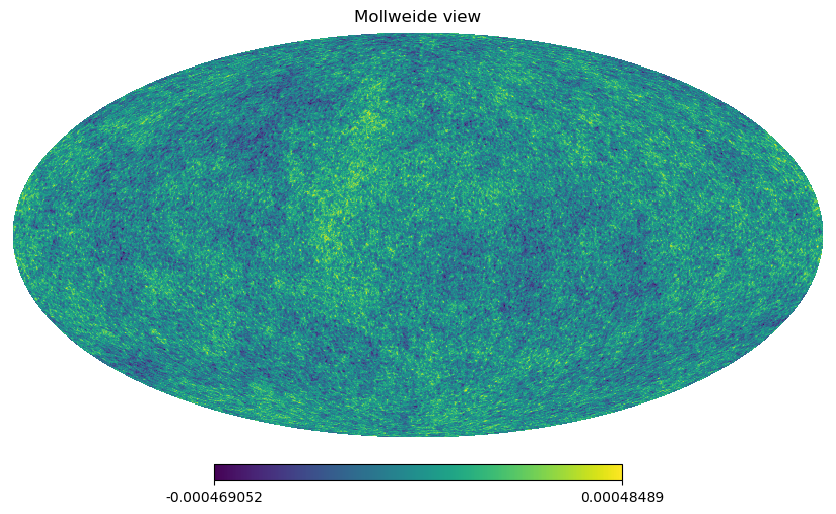

In [224]:
hp.mollview(mock_map)

In [225]:
# Misuriamo C_l del campo dalla mappa
C_meas = hp.anafast(mock_map, lmax=2048)

In [226]:
C_meas.shape

(2049,)

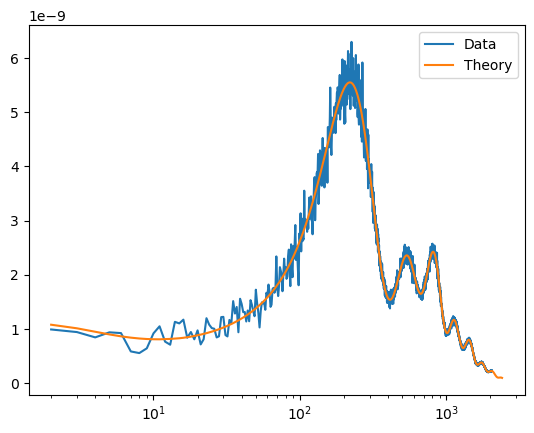

In [231]:
ell_measured = np.arange(len(C_meas))
plt.semilogx(ell_measured[2:], C_meas[2:]* ell_measured[2:]* (ell_measured[2:]+1)/(2*np.pi), label='Data')
plt.semilogx(ells[2:], C_l[2:] * ells[2:] * (ells[2:]+1)/(2*np.pi), label='Theory')
plt.legend(loc='best')
